### Hashim M Nadeem
#### 21i-1675

In [ ]:
import re
import unicodedata

# List of conjunctions in Urdu
conjunctions = [
    'مگر', 'لیکن', 'کیونکہ', 'بلکہ', 'چنانچہ', 'گویا', 'یعنی',
    'اس لئے', 'تاہم', 'جبکہ', 'اگرچہ', 'حالانکہ', 'چونکہ', 'اگر',
    'تو', 'ورنہ', 'پھر',
    # Exclude 'اور' from conjunctions to prevent splitting
    # Exclude 'کہ' as it's often part of other words
]

# List of sentence boundary markers (unigram, bigram, trigram)
boundary_markers = [
    'ہے', 'ہیں', 'تھا', 'تھی', 'تھے', 'ہوگا', 'ہوگی', 'ہوگئے', 'ہوئیں',
    'ہوچکا', 'ہوچکی', 'گیا', 'گئی', 'گئے', 'کرے گا', 'کرے گی', 'کیا',
    'کر چکے', 'چلا گیا', 'دے دیا', 'لگ گیا', 'کرتے ہیں',
    'رکھا ہے', 'لیا', 'دیا', 'بن گئی', 'رکھ دی', 'کیجیے', 'کیجئے',
    'گئیں', 'تھیں', 'ہوں', 'خریدا', 'ہونگے', 'چاہیے', 'جاسکے',
    'بنیں', 'جائیں', 'چاہئے', 'کھایا', 'رہا', 'سکے', 'کرسکے',
    'حوالے کئے', 'حاصل کئے', 'کروائیں گے', 'کرچکے ہیں', 'کریں گے',
    'جائے گا', 'کیا گیا', 'جائے گی', 'کئے گئے'
]

## Import Libraries and Define Conjunctions & Boundary Markers

### Purpose:
This kernel sets up the initial list of conjunctions and boundary markers that are essential for performing sentence segmentation in Urdu.

### Code Breakdown:

1. **Imports:**
    - `re`: This library is used for regular expression operations, essential for text processing.
    - `unicodedata`: This library is used for Unicode character normalization, ensuring text consistency.

2. **Conjunctions List:**
    - A list of common Urdu conjunctions is defined. These conjunctions help in identifying where a sentence may be split into smaller clauses.
    - Notably, **'اور'** (meaning "and") is excluded from this list to avoid splitting at "and", as this could break the flow of compound sentences.
    - **'کہ'** (meaning "that") is also excluded since it is frequently part of other words and could lead to incorrect splitting.

3. **Boundary Markers:**
    - This list contains common **unigram, bigram, and trigram boundary markers** in Urdu that indicate the end of a sentence or a clause. 
    - The list includes verb conjugations, auxiliary verbs, and specific phrase patterns commonly used in Urdu that indicate the completion of an idea or thought.
    - For example:
        - 'ہے', 'تھا', 'تھی' (unigrams): Single words that often indicate sentence endings.
        - 'کر چکے', 'کروائیں گے' (bigrams): Phrases that commonly occur at the end of clauses.
        - 'کیا گیا', 'کئے گئے' (trigrams): More complex patterns that indicate transitions or conclusions.

### Why This Approach:
- **Conjunctions**: Used to segment compound sentences into simpler ones where appropriate, without losing meaning.
- **Boundary Markers**: These help identify the end of clauses or sentences, essential for effective sentence segmentation.
- The exclusions of **'اور'** and **'کہ'** are critical to avoid over-segmentation in situations where these words function more as connecting elements than boundary markers.

### Challenges Addressed:
- Urdu's sentence structure includes compound sentences with multiple clauses joined by conjunctions, so careful handling of these conjunctions and boundary markers is necessary to prevent incorrect splits.


In [2]:
def pre_processing(text):
    """
    Preprocesses the Urdu text string, standardizes punctuation, removes unwanted characters,
    and ensures proper spacing around punctuation marks.
    """
    # Step 1: Unicode normalization
    text = unicodedata.normalize('NFKC', text)

    # Step 2: Replace English punctuation with Urdu equivalents
    text = text.replace('.', '۔')
    text = text.replace('?', '؟')
    text = text.replace(',', '،')
    text = text.replace(';', '؛')

    # Step 3: Preserve Urdu letters and punctuation
    urdu_letters = r'\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF'
    standard_punctuation = r'،؛۔!?…'
    allowed_chars = f'[{urdu_letters}{standard_punctuation}\s]'
    text = re.sub(f'[^{allowed_chars}]', '', text)

    # Step 4: Normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Step 5: Normalize punctuation marks
    text = re.sub(r'[!]+', '!', text)
    text = re.sub(r'[؟]+', '؟', text)
    text = re.sub(r'[۔]+', '۔', text)
    text = re.sub(r'[…]+', '…', text)

    return text

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4z/b4t1_hr57n71gbffwk6cw43w0000gn/T/ipykernel_40609/646064981.py:18: SyntaxWarning: invalid escape sequence '\s'
  allowed_chars = f'[{urdu_letters}{standard_punctuation}\s]'


## Preprocessing Urdu Text for Sentence Segmentation

### Purpose:
This kernel defines the function `pre_processing()` to clean and standardize the Urdu text before segmentation. It handles Unicode normalization, punctuation standardization, and character filtering.

### Code Breakdown:

1. **Unicode Normalization:**
   - The function starts by applying Unicode normalization (`NFKC` form) to the input text. This process ensures that any text inconsistencies (such as different representations of the same character) are resolved, making the text uniform.
   - **Why**: Urdu text may contain characters that are encoded differently depending on the source, and normalizing them makes further processing more reliable.

2. **Punctuation Replacement:**
   - English punctuation marks (such as periods `.` and commas `,`) are replaced with their Urdu equivalents (`۔` and `،`). This step ensures that sentence-ending punctuation is consistent with the language's script.
   - The function handles:
     - **`.`** → `۔` (Urdu full stop)
     - **`?`** → `؟` (Urdu question mark)
     - **`,`** → `،` (Urdu comma)
     - **`;`** → `؛` (Urdu semicolon)
   - **Why**: Urdu texts may contain mixed punctuation from English, and replacing them helps maintain consistency in sentence boundary detection.

3. **Preserving Urdu Letters and Punctuation:**
   - A regular expression (`re.sub()`) is used to remove any non-Urdu characters from the text. Only Urdu letters (Unicode ranges `\u0600-\u06FF`, `\u0750-\u077F`, `\u08A0-\u08FF`) and standard punctuation marks (`،`, `؛`, `۔`, `؟`, `!`, `…`) are kept.
   - **Why**: This step ensures that only valid Urdu script and punctuation remain in the text, eliminating any noise from other languages or symbols.

4. **Space Normalization:**
   - The function replaces multiple spaces with a single space (`\s+ → ' '`) and removes leading or trailing spaces using `.strip()`.
   - **Why**: Proper spacing around words and punctuation is essential for clean sentence segmentation. This step ensures there are no extraneous spaces that could interfere with text processing.

5. **Punctuation Normalization:**
   - Consecutive punctuation marks like exclamation points (`!`) and periods (`۔`) are reduced to a single instance (e.g., `!!!` becomes `!`). This prevents over-segmentation due to repeated punctuation marks.
   - **Why**: Repeated punctuation may introduce unnecessary breaks in sentence segmentation. By normalizing these, we maintain sentence coherence.

### Why This Approach:
- **Unicode Normalization** ensures the text is consistent regardless of its origin.
- **Punctuation Replacement** adapts English marks to their Urdu counterparts, ensuring correct sentence-ending detection.
- **Character Filtering** ensures that the text remains focused on Urdu, avoiding noise from non-Urdu characters.
- **Space and Punctuation Normalization** prepares the text for segmentation by standardizing spacing and punctuation usage.

### Challenges Addressed:
- Mixed language texts with English punctuation can cause incorrect sentence boundary detection.
- Irregular spacing and non-Urdu characters can introduce noise in the segmentation process.
- This preprocessing step is crucial to ensuring that the Urdu text is clean, standardized, and ready for further processing.



In [3]:
def tokenize_words(text):
    """
    Tokenizes the text into words, handling Urdu-specific issues.
    """
    # Split on spaces
    words = text.split()
    return words

- **Function**: `tokenize_words(text)`
- **Description**: This function takes a string of text and splits it into individual words using spaces as delimiters.
    - **Why**: Since spaces separate words in Urdu, this function simply tokenizes based on the spaces.
    - **Key Challenge**: Urdu words are separated by spaces, so this function doesn't require much complexity beyond splitting on spaces.

In [4]:
def segment_on_boundary_markers(text):
    """
    Segments the text based on boundary markers using n-gram approach.
    """
    words = tokenize_words(text)
    segments = []
    start = 0
    i = 0
    while i < len(words):
        found_boundary = False
        # Check for n-gram boundary markers (trigram to unigram)
        for n in range(3, 0, -1):
            if i + 1 - n >= start:
                ngram = ' '.join(words[i + 1 - n:i + 1])
                if ngram in boundary_markers:
                    # Ensure the n-gram is at the end of a clause
                    segment = words[start:i + 1]
                    segments.append(' '.join(segment).strip())
                    start = i + 1
                    found_boundary = True
                    break  # Break inner loop if boundary is found
        if found_boundary:
            i = start - 1  # Adjust index after segmentation
        i += 1
    # Add any remaining words as a segment
    if start < len(words):
        segment = words[start:]
        segments.append(' '.join(segment).strip())
    return segments

- **Function**: `segment_on_boundary_markers(text)`
- **Description**: This function segments text into clauses or sentences based on the presence of boundary markers. It uses a **n-gram approach** (3-gram, bigram, and unigram) to identify sentence-ending boundaries.
    - **How It Works**:
        - The text is first tokenized into words using the `tokenize_words` function.
        - The function loops through the words and checks for boundary markers (e.g., "ہے", "گئے", etc.) in a **trigram-first approach**.
            - **Why n-grams?**: Longer sequences (trigrams) provide more context, reducing incorrect splits caused by short or ambiguous boundary markers.
            - For example, "گئے" is more likely to be an actual sentence boundary than "ہے" when checking the surrounding words.
        - Once an n-gram boundary is found, the words from the last boundary up to the current n-gram are added as a segment.
        - The function continues until all words are segmented, with any remaining words being added as the final segment.
    - **Why Use n-Grams?**
        - **Trigram**: Provides better context, ensuring the boundary is at the end of a meaningful clause.
        - **Bigram and Unigram**: Serve as fallbacks if no trigram is found, allowing flexibility in boundary detection.
    - **Handling Edge Cases**:
        - If a boundary marker is found, it ensures that it is at the end of a clause before splitting, which helps avoid unnecessary or incorrect segmentations.
        - The loop continues, even adjusting the index (`i = start - 1`) after a segment is found, ensuring no words are skipped.

### Challenges Addressed:

- **Ambiguity in Sentence Boundaries**: Using n-grams helps reduce false positives caused by short boundary markers. For example, the word "ہے" could appear in many contexts, but by checking the surrounding words (via trigrams), we avoid over-segmentation.
- **Urdu Specific Context**: Urdu's sentence structure often involves long clauses connected by conjunctions and boundary markers. This approach captures meaningful boundaries while minimizing false segmentation.

### Key Benefits:

- **Trigram Priority**: Ensures that sentence boundaries are based on the most reliable information (context).
- **Robust to Edge Cases**: Even if no trigram boundary is found, the function falls back on bigrams and unigrams, ensuring flexibility.
- **Efficient Handling of Words**: By breaking text into manageable segments, we ensure that each clause or sentence is meaningfully grouped for further analysis.

In [5]:
def urdu_sentence_segmentation(text):
    """
    Segments Urdu text into sentences based on punctuation marks, boundary markers, and conjunctions.
    Implements n-gram approaches to accurately detect sentence boundaries.
    """
    # Step 1: Initial segmentation based on punctuation marks
    sentence_enders = r'[۔؟!…]'
    sentences = re.split(f'({sentence_enders})', text)
    initial_sentences = []

    # Combine punctuation marks with sentences
    for i in range(0, len(sentences) - 1, 2):
        sentence = sentences[i].strip()
        punctuation = sentences[i+1].strip()
        full_sentence = f'{sentence}{punctuation}'
        if full_sentence:
            initial_sentences.append(full_sentence)

    # Handle any remaining text without ending punctuation
    if len(sentences) % 2 != 0:
        last_sentence = sentences[-1].strip()
        if last_sentence:
            initial_sentences.append(last_sentence)

    # Step 2: Process each sentence for compound segmentation
    final_sentences = []
    for sentence in initial_sentences:
        # Tokenize the sentence into words
        words = tokenize_words(sentence)

        # Identify positions of conjunctions
        conjunction_indices = [i for i, word in enumerate(words) if word in conjunctions]
                # Segment at conjunctions if appropriate
        if conjunction_indices:
            segments = []
            start = 0
            for idx in conjunction_indices:
                # Ensure the conjunction is not at the beginning
                if idx > start:
                    segment = words[start:idx]
                    if segment:
                        segments.append(' '.join(segment).strip())
                    start = idx
            # Add the remaining part
            segment = words[start:]
            if segment:
                segments.append(' '.join(segment).strip())
            # Process each segment further
            for seg in segments:
                further_segments = segment_on_boundary_markers(seg)
                final_sentences.extend(further_segments)
        else:
            # No conjunctions, segment on boundary markers
            further_segments = segment_on_boundary_markers(sentence)
            final_sentences.extend(further_segments)

    # Remove any empty strings
    final_sentences = [s for s in final_sentences if s]

    # Optional: Remove sentences that are too short (e.g., one or two words)
    final_sentences = [s for s in final_sentences if len(s.split()) > 2]

    # Step 3: Join sentences that start with 'اور' to the previous sentence
    merged_sentences = []
    i = 0
    while i < len(final_sentences):
        sentence = final_sentences[i]
        if sentence.startswith('اور') and i > 0:
            # Join with the previous sentence
            merged_sentence = merged_sentences[-1] + ' ' + sentence
            merged_sentences[-1] = merged_sentence
        else:
            merged_sentences.append(sentence)
        i += 1

    return merged_sentences

## Urdu Sentence Segmentation with Compound Sentence Handling

### Purpose:
This kernel focuses on segmenting Urdu text into sentences based on punctuation marks, boundary markers, and conjunctions, while handling compound sentences using an n-gram approach.

### Code Breakdown:

### 1. Initial Segmentation Using Punctuation:
```python
sentence_enders = r'[۔؟!…]'
sentences = re.split(f'({sentence_enders})', text)
initial_sentences = []

```

- **Description**:
    - **Regular Expression for Punctuation**: The `sentence_enders` variable defines common Urdu punctuation marks (e.g., "۔", "؟", "!"). These are used as sentence delimiters.
    - **Splitting the Text**: The `re.split()` function splits the input text into parts, where punctuation marks separate the sentences.
    - **Why**: Punctuation is the most basic indicator of sentence boundaries in any language, and in Urdu, marks like "؟" and "۔" are crucial for segmentation.

### 2. Combine Punctuation with Sentences:

```python
for i in range(0, len(sentences) - 1, 2):
    sentence = sentences[i].strip()
    punctuation = sentences[i+1].strip()
    full_sentence = f'{sentence}{punctuation}'
    if full_sentence:
        initial_sentences.append(full_sentence)

```

- **Description**:
    - This part of the code ensures that the punctuation mark stays attached to the sentence. Every two elements from the `sentences` list (a sentence and its corresponding punctuation) are combined.
    - **Why**: Sentences in Urdu often end with a punctuation mark, so the algorithm should merge the sentence with the punctuation to preserve meaning and structure.

### 3. Handling Remaining Text Without Punctuation:

```python
if len(sentences) % 2 != 0:
    last_sentence = sentences[-1].strip()
    if last_sentence:
        initial_sentences.append(last_sentence)

```

- **Description**:
    - If the last portion of the text does not end with punctuation, it adds the final sentence to `initial_sentences`.
    - **Why**: In case the text ends abruptly without punctuation, this handles that edge case by ensuring no meaningful text is discarded.

### 4. Processing for Compound Sentences:

```python
conjunction_indices = [i for i, word in enumerate(words) if word in conjunctions]
if conjunction_indices:
    # Handle segmentation at conjunctions
else:
    # No conjunctions, proceed with boundary markers

```

- **Description**:
    - **Conjunction-Based Segmentation**: First, the code identifies any conjunctions (like "مگر", "لیکن") within a sentence. If conjunctions are found, the sentence is split at those positions.
    - **Why**: Compound sentences in Urdu are often joined by conjunctions, which make them longer and harder to process. By splitting these, we handle large sentences more effectively.

### 5. Further Segmentation Based on Boundary Markers:

```python
further_segments = segment_on_boundary_markers(sentence)

```

- **Description**:
    - If no conjunctions are found, the function falls back on boundary markers (defined by n-grams) to segment the sentence further.
    - **Why**: Boundary markers like "ہے", "تھا", etc., are common sentence-ending elements that help in detecting sentence boundaries when conjunctions are absent.

### 6. Joining Sentences Starting with 'اور':

```python
merged_sentences = []
i = 0
while i < len(final_sentences):
    sentence = final_sentences[i]
    if sentence.startswith('اور') and i > 0:
        merged_sentence = merged_sentences[-1] + ' ' + sentence
        merged_sentences[-1] = merged_sentence
    else:
        merged_sentences.append(sentence)
    i += 1

```

- **Description**:
    - **Joining Sentences with 'اور'**: Sentences that start with "اور" are likely continuations of previous sentences. This code merges them with the preceding sentence.
    - **Why**: The word "اور" means "and," which implies a continuation of thought or action from the previous sentence. By joining them, the text remains coherent and avoids unnecessary splitting.

### Challenges Addressed:

- **Compound Sentence Segmentation**: Urdu has long compound sentences joined by conjunctions like "لیکن" or "مگر". This approach allows us to segment them more meaningfully without losing context.
- **Boundary Markers**: For sentences without conjunctions, boundary markers help segment based on more subtle sentence-ending clues.
- **Handling Continuations**: Sentences starting with "اور" are treated as continuations of the previous sentence, avoiding improper segmentation.

### Key Benefits:

- **Compound Sentence Handling**: By recognizing conjunctions, we can split complex sentences into smaller, manageable parts.
- **N-Gram Boundary Markers**: The n-gram approach ensures sentence boundaries are accurate, preventing false splits.
- **Improved Coherence**: Joining sentences with "اور" maintains text coherence, crucial for Urdu text, where thoughts often span multiple sentences.

In [6]:
# Read the text file
with open('/Users/hashimmuhammadnadeem/sentence/urdu-corpus.txt', 'rt', encoding='utf-8') as f:
    text = f.read()

# Preprocess the text
text = pre_processing(text)

# Segment the text
segmented_text = urdu_sentence_segmentation(text)

# Count the number of sentences
sentence_count = len(segmented_text)
print(f"Number of sentences in the segmented text: {sentence_count}")

# Optionally, save the segmented sentences to a file
with open('segmented_sentences.txt', 'w', encoding='utf-8') as f:
    for sentence in segmented_text:
        f.write(sentence + '\n')

Number of sentences in the segmented text: 75908


In [7]:
import re
import unicodedata
import pandas as pd

# List of conjunctions in Urdu
conjunctions = [
    'مگر', 'لیکن', 'کیونکہ', 'بلکہ', 'چنانچہ', 'گویا', 'یعنی',
    'اس لئے', 'تاہم', 'جبکہ', 'اگرچہ', 'حالانکہ', 'چونکہ', 'اگر',
    'تو', 'ورنہ', 'پھر',
    # Exclude 'اور' to handle it separately
]

# List of sentence boundary markers (unigram, bigram, trigram)
boundary_markers = [
    'ہے', 'ہیں', 'تھا', 'تھی', 'تھے', 'ہوگا', 'ہوگی', 'ہوگئے', 'ہوئیں',
    'ہوچکا', 'ہوچکی', 'گیا', 'گئی', 'گئے', 'کرے گا', 'کرے گی', 'کیا',
    'کر چکے', 'چلا گیا', 'دے دیا', 'لگ گیا', 'کرتے ہیں',
    'رکھا ہے', 'لیا', 'دیا', 'بن گئی', 'رکھ دی', 'کیجیے', 'کیجئے',
    'گئیں', 'تھیں', 'ہوں', 'خریدا', 'ہونگے', 'چاہیے', 'جاسکے',
    'بنیں', 'جائیں', 'چاہئے', 'کھایا', 'رہا', 'سکے', 'کرسکے',
    'حوالے کئے', 'حاصل کئے', 'کروائیں گے', 'کرچکے ہیں', 'کریں گے',
    'جائے گا', 'کیا گیا', 'جائے گی', 'کئے گئے'
]

def comprehensive_pre_processing(text):
    """
    Preprocesses the Urdu text string, standardizes punctuation, removes unwanted characters,
    and ensures proper spacing around punctuation marks.
    """
    # Step 1: Unicode normalization
    text = unicodedata.normalize('NFKC', text)

    # Step 2: Replace English punctuation with Urdu equivalents
    text = text.replace('.', '۔')
    text = text.replace('?', '؟')
    text = text.replace(',', '،')
    text = text.replace(';', '؛')

    # Step 3: Preserve Urdu letters and punctuation
    urdu_letters = r'\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF'
    standard_punctuation = r'،؛۔!?…'
    allowed_chars = f'[{urdu_letters}{standard_punctuation}\s]'
    text = re.sub(f'[^{allowed_chars}]', '', text)

    # Step 4: Normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Step 5: Normalize punctuation marks
    text = re.sub(r'[!]+', '!', text)
    text = re.sub(r'[؟]+', '؟', text)
    text = re.sub(r'[۔]+', '۔', text)
    text = re.sub(r'[…]+', '…', text)

    return text

def tokenize_words(text):
    """
    Tokenizes the text into words, handling Urdu-specific issues.
    """
    # Split on spaces
    words = text.split()
    return words

def urdu_sentence_segmentation(text):
    """
    Segments Urdu text into sentences based on punctuation marks, boundary markers, and conjunctions.
    Returns a list of tuples: (sentence, segmentation_reason)
    """
    segmentation_results = []

    # Step 1: Initial segmentation based on punctuation marks
    sentence_enders = r'[۔؟!…]'
    sentences = re.split(f'({sentence_enders})', text)
    initial_sentences = []

    # Combine punctuation marks with sentences
    for i in range(0, len(sentences) - 1, 2):
        sentence = sentences[i].strip()
        punctuation = sentences[i+1].strip()
        full_sentence = f'{sentence}{punctuation}'
        if full_sentence:
            initial_sentences.append((full_sentence, 'Punctuation'))

    # Handle any remaining text without ending punctuation
    if len(sentences) % 2 != 0:
        last_sentence = sentences[-1].strip()
        if last_sentence:
            initial_sentences.append((last_sentence, 'Punctuation'))

    # Step 2: Process each sentence for compound segmentation
    final_sentences = []
    for sentence_tuple in initial_sentences:
        sentence, reason = sentence_tuple
        # Tokenize the sentence into words
        words = tokenize_words(sentence)

        # Identify positions of conjunctions
        conjunction_indices = [i for i, word in enumerate(words) if word in conjunctions]

        # Segment at conjunctions if appropriate
        if conjunction_indices:
            segments = []
            start = 0
            for idx in conjunction_indices:
                # Ensure the conjunction is not at the beginning
                if idx > start:
                    segment_words = words[start:idx]
                    if segment_words:
                        segment = ' '.join(segment_words).strip()
                        segments.append((segment, 'Conjunction'))
                    start = idx
            # Add the remaining part
            segment_words = words[start:]
            if segment_words:
                segment = ' '.join(segment_words).strip()
                segments.append((segment, reason))  # Use previous reason
            # Process each segment further
            for seg_tuple in segments:
                seg_sentence, seg_reason = seg_tuple
                further_segments = segment_on_boundary_markers(seg_sentence, seg_reason)
                final_sentences.extend(further_segments)
        else:
            # No conjunctions, segment on boundary markers
            further_segments = segment_on_boundary_markers(sentence, reason)
            final_sentences.extend(further_segments)

    # Remove any empty strings
    final_sentences = [s for s in final_sentences if s[0]]

    # Optional: Remove sentences that are too short (e.g., one or two words)
    final_sentences = [s for s in final_sentences if len(s[0].split()) > 2]

    # Step 3: Join sentences that start with 'اور' to the previous sentence
    merged_sentences = []
    i = 0
    while i < len(final_sentences):
        sentence, reason = final_sentences[i]
        if sentence.startswith('اور') and i > 0:
            # Merge with the previous sentence
            prev_sentence, prev_reason = merged_sentences[-1]
            merged_sentence = prev_sentence + ' ' + sentence
            merged_reason = prev_reason + ' + Merged with next starting with "اور"'
            merged_sentences[-1] = (merged_sentence, merged_reason)
        else:
            merged_sentences.append((sentence, reason))
        i += 1

    return merged_sentences

def segment_on_boundary_markers(text, prev_reason):
    """
    Segments the text based on boundary markers using n-gram approach.
    Returns a list of tuples: (sentence, segmentation_reason)
    """
    words = tokenize_words(text)
    segments = []
    start = 0
    i = 0
    while i < len(words):
        found_boundary = False
        # Check for n-gram boundary markers (trigram to unigram)
        for n in range(3, 0, -1):
            if i + 1 - n >= start:
                ngram = ' '.join(words[i + 1 - n:i + 1])
                if ngram in boundary_markers:
                    # Ensure the n-gram is at the end of a clause
                    segment_words = words[start:i + 1]
                    segment = ' '.join(segment_words).strip()
                    segments.append((segment, 'Boundary Marker'))
                    start = i + 1
                    found_boundary = True
                    break  # Break inner loop if boundary is found
        if found_boundary:
            i = start - 1  # Adjust index after segmentation
        i += 1
    # Add any remaining words as a segment
    if start < len(words):
        segment_words = words[start:]
        segment = ' '.join(segment_words).strip()
        segments.append((segment, prev_reason))
    return segments

if __name__ == '__main__':
    # Read the text file
    with open('/Users/hashimmuhammadnadeem/sentence/urdu-corpus.txt', 'rt', encoding='utf-8') as f:
        text = f.read()

    # Preprocess the text
    text = comprehensive_pre_processing(text)

    # Segment the text
    segmented_sentences = urdu_sentence_segmentation(text)

    # Create a DataFrame with sentences and segmentation reasons
    df = pd.DataFrame(segmented_sentences, columns=['Sentence', 'SegmentationReason'])

    # Count the number of sentences
    sentence_count = len(df)
    print(f"Number of sentences in the segmented text: {sentence_count}")

<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4z/b4t1_hr57n71gbffwk6cw43w0000gn/T/ipykernel_40609/1835040665.py:43: SyntaxWarning: invalid escape sequence '\s'
  allowed_chars = f'[{urdu_letters}{standard_punctuation}\s]'


Number of sentences in the segmented text: 75908
                                            Sentence SegmentationReason
0        گزشتہ کئی سالوں سے مختلف بحران آتے جاتے رہے        Conjunction
1  لیکن حالیہ آٹا ، چینی سمیت دیگر بحران اچانک پی...    Boundary Marker
2                             تاکہ عوام کو ریلیف دیا    Boundary Marker
3  دوسری جانب بجلی ، گیس ، پانی سمیت دیگر بلوں می...    Boundary Marker
4  ،صوبائی و وفاقی وزراء نے اپنے اپنے ایوانوں بحر...        Punctuation


This is the same code, except it does it in a dataframe instead, and uses another column called SegmentationReason

In [9]:
df

,Sentence,SegmentationReason
0,گزشتہ کئی سالوں سے مختلف بحران آتے جاتے رہے,Conjunction
1,لیکن حالیہ آٹا ، چینی سمیت دیگر بحران اچانک پی...,Boundary Marker
2,تاکہ عوام کو ریلیف دیا,Boundary Marker
3,دوسری جانب بجلی ، گیس ، پانی سمیت دیگر بلوں می...,Boundary Marker
4,،صوبائی و وفاقی وزراء نے اپنے اپنے ایوانوں بحر...,Punctuation
...,...,...
75903,کیا22سالہ جدوجہداورقربانیوں کامنطقی مقصدفقت یہ...,Punctuation
75904,اب دیکھنایہ ہے,Boundary Marker
75905,کہ عمران خان نے الیکشن سے پہلے جوبھڑکیں ماری و...,Boundary Marker
75906,یاصرف عوام کواذیت دے کے رخصت ہوجاتے ہیں,Boundary Marker


In [13]:
import pandas as pd

# Your BPE functions from above
def get_pair_freq(corpus):
    """Calculate the frequency of consecutive pairs of tokens in the corpus."""
    counts = {}
    for i in range(len(corpus) - 1):
        pair = (corpus[i], corpus[i + 1])
        if pair in counts:
            counts[pair] += 1
        else:
            counts[pair] = 1
    return counts

def merge(cipher, pair, new_token):
    """Merge a given pair in the cipher and replace it with a new token."""
    new_cipher = []
    i = 0
    while i < len(cipher):
        if i < len(cipher) - 1 and cipher[i] == pair[0] and cipher[i + 1] == pair[1]:
            new_cipher.append(new_token)
            i += 2  # Skip over the merged pair
        else:
            new_cipher.append(cipher[i])
            i += 1
    return new_cipher

def encode(text, max_merges=40):
    """Encode the text using BPE, returning the merged cipher and the vocabulary."""
    corpus = list(text)  # List of characters/tokens
    cipher = corpus[:]
    merges = {}
    token_counter = 256  # Start new tokens at 256 (ASCII range ends at 255)

    # Perform merging up to max_merges times
    for _ in range(max_merges):
        pair_freq = get_pair_freq(cipher)
        
        # If no frequent pairs, stop the merge process
        if not pair_freq:
            break

        # Find the most frequent pair
        most_frequent_pair = max(pair_freq, key=pair_freq.get)

        # Only merge if the pair frequency is greater than 1 to avoid merging sparse pairs
        if pair_freq[most_frequent_pair] <= 1:
            break

        # Assign a new token for this pair
        new_token = token_counter
        token_counter += 1

        # Update cipher with the merged token
        cipher = merge(cipher, most_frequent_pair, new_token)
        merges[most_frequent_pair] = new_token

    return cipher, merges

def decode(cipher, merges):
    """Decode the BPE-encoded cipher back into the original text using the merges."""
    reverse_merges = {v: k for k, v in merges.items()}
    
    # Decoding step by step, replacing tokens with original pairs
    decoded_text = cipher[:]
    made_replacement = True
    
    while made_replacement:
        made_replacement = False
        new_decoded_text = []
        
        i = 0
        while i < len(decoded_text):
            if decoded_text[i] in reverse_merges:
                # Replace token with original pair
                pair = reverse_merges[decoded_text[i]]
                new_decoded_text.append(pair[0])
                new_decoded_text.append(pair[1])
                made_replacement = True
            else:
                new_decoded_text.append(decoded_text[i])
            i += 1

        decoded_text = new_decoded_text

    return ''.join(chr(t) if isinstance(t, int) else t for t in decoded_text)

# Function to apply BPE encoding to each sentence
def apply_bpe_to_sentence(sentence):
    cipher, merges = encode(sentence)
    return cipher, merges  # Returning both the BPE-encoded sentence (cipher) and merges

# Function to decode a BPE-encoded sentence
def decode_bpe_sentence(bpe_tokens, merges):
    return decode(bpe_tokens, merges)


# Apply the BPE encoding to the 'Sentence' column and store both the tokens and merges
df[['BPE_Tokens', 'Merges']] = df['Sentence'].apply(lambda x: pd.Series(apply_bpe_to_sentence(x)))

# Apply the decoding process to get the decoded sentences
df['Decoded_Sentence'] = df.apply(lambda row: decode_bpe_sentence(row['BPE_Tokens'], row['Merges']), axis=1)

# Display the updated DataFrame with BPE tokens and decoded sentences
df


,Sentence,SegmentationReason,BPE_Tokens,Merges,Decoded_Sentence
0,گزشتہ کئی سالوں سے مختلف بحران آتے جاتے رہے,Conjunction,"[گ, ز, ش, ت, ہ, , ک, ئ, ی, 257, ا, ل, و, ں, 2...","{('ے', ' '): 256, (' ', 'س'): 257, ('ت', 256):...",گزشتہ کئی سالوں سے مختلف بحران آتے جاتے رہے
1,لیکن حالیہ آٹا ، چینی سمیت دیگر بحران اچانک پی...,Boundary Marker,"[259, ک, 260, ح, ا, 259, ہ, 261, ٹ, ا, , ،, ...","{(' ', 'ا'): 256, ('ی', ' '): 257, (' ', 'د'):...",لیکن حالیہ آٹا ، چینی سمیت دیگر بحران اچانک پی...
2,تاکہ عوام کو ریلیف دیا,Boundary Marker,"[ت, ا, ک, ہ, , ع, و, ا, م, , ک, و, , ر, ی, ...",{},تاکہ عوام کو ریلیف دیا
3,دوسری جانب بجلی ، گیس ، پانی سمیت دیگر بلوں می...,Boundary Marker,"[د, و, س, ر, 256, ج, 258, ب, 259, ج, ل, 256, ،...","{('ی', ' '): 256, (' ', 'گ'): 257, ('ا', 'ن'):...",دوسری جانب بجلی ، گیس ، پانی سمیت دیگر بلوں می...
4,،صوبائی و وفاقی وزراء نے اپنے اپنے ایوانوں بحر...,Punctuation,"[،, ص, و, ب, 260, 263, , و, ف, ا, ق, 263, ز, ...","{('ے', ' '): 256, ('ی', ' '): 257, (' ', 'ک'):...",،صوبائی و وفاقی وزراء نے اپنے اپنے ایوانوں بحر...
...,...,...,...,...,...
75903,کیا22سالہ جدوجہداورقربانیوں کامنطقی مقصدفقت یہ...,Punctuation,"[ک, ی, ا, 2, 2, س, ا, ل, ہ, , ج, د, و, ج, ہ, ...","{('ی', ' '): 256, ('ت', ' '): 257}",کیا22سالہ جدوجہداورقربانیوں کامنطقی مقصدفقت یہ...
75904,اب دیکھنایہ ہے,Boundary Marker,"[ا, ب, , د, ی, ک, ھ, ن, ا, ی, ہ, , ہ, ے]",{},اب دیکھنایہ ہے
75905,کہ عمران خان نے الیکشن سے پہلے جوبھڑکیں ماری و...,Boundary Marker,"[ک, 258, ع, م, ر, 259, خ, 259, ن, 256, ا, ل, ی...","{('ے', ' '): 256, ('ن', ' '): 257, ('ہ', ' '):...",کہ عمران خان نے الیکشن سے پہلے جوبھڑکیں ماری و...
75906,یاصرف عوام کواذیت دے کے رخصت ہوجاتے ہیں,Boundary Marker,"[ی, ا, ص, ر, ف, , ع, 257, م, , ک, 257, ذ, ی,...","{('ے', ' '): 256, ('و', 'ا'): 257, ('ت', ' '):...",یاصرف عوام کواذیت دے کے رخصت ہوجاتے ہیں


## Byte Pair Encoding (BPE) for Urdu Sentences

### Purpose:
This kernel introduces the Byte Pair Encoding (BPE) algorithm for encoding and decoding sentences. It handles Urdu sentences by representing frequent pairs of tokens with unique, compact tokens, which makes it more efficient for downstream tasks like tokenization.

### Code Breakdown:

### 1. Calculating the Frequency of Consecutive Token Pairs:
```python
def get_pair_freq(corpus):
    counts = {}
    for i in range(len(corpus) - 1):
        pair = (corpus[i], corpus[i + 1])
        if pair in counts:
            counts[pair] += 1
        else:
            counts[pair] = 1
    return counts

```

- **Description**:
    - **Token Pair Frequency Calculation**: This function scans the corpus (text represented as a list of characters or tokens) and counts how often each consecutive pair of tokens appears.
    - **Why**: In BPE, frequent pairs are merged into new tokens, so it's necessary to first calculate the frequency of consecutive pairs.

### 2. Merging the Most Frequent Pair:

```python
def merge(cipher, pair, new_token):
    new_cipher = []
    i = 0
    while i < len(cipher):
        if i < len(cipher) - 1 and cipher[i] == pair[0] and cipher[i + 1] == pair[1]:
            new_cipher.append(new_token)
            i += 2  # Skip over the merged pair
        else:
            new_cipher.append(cipher[i])
            i += 1
    return new_cipher

```

- **Description**:
    - **Merging Frequent Pairs**: The function replaces the most frequent pair with a new token in the text (cipher), effectively reducing the number of tokens in the text.
    - **Why**: By merging frequent pairs, the algorithm reduces the number of tokens and creates a more compact representation of the text.

### 3. Encoding Text Using BPE:

```python
def encode(text, max_merges=40):
    corpus = list(text)  # List of characters/tokens
    cipher = corpus[:]
    merges = {}
    token_counter = 256  # Start new tokens at 256 (ASCII range ends at 255)

    for _ in range(max_merges):
        pair_freq = get_pair_freq(cipher)

        if not pair_freq:
            break

        most_frequent_pair = max(pair_freq, key=pair_freq.get)

        if pair_freq[most_frequent_pair] <= 1:
            break

        new_token = token_counter
        token_counter += 1

        cipher = merge(cipher, most_frequent_pair, new_token)
        merges[most_frequent_pair] = new_token

    return cipher, merges

```

- **Description**:
    - **BPE Encoding**: This function performs BPE by repeatedly merging frequent pairs up to a maximum of 40 times. The function returns the encoded text (cipher) and a dictionary of merges.
    - **Why**: The BPE algorithm transforms the input text into a compact representation, allowing us to handle the tokenization efficiently for Urdu, where compound words and phrases are common.

### 4. Decoding BPE-Encoded Text:

```python
def decode(cipher, merges):
    reverse_merges = {v: k for k, v in merges.items()}

    decoded_text = cipher[:]
    made_replacement = True

    while made_replacement:
        made_replacement = False
        new_decoded_text = []

        i = 0
        while i < len(decoded_text):
            if decoded_text[i] in reverse_merges:
                pair = reverse_merges[decoded_text[i]]
                new_decoded_text.append(pair[0])
                new_decoded_text.append(pair[1])
                made_replacement = True
            else:
                new_decoded_text.append(decoded_text[i])
            i += 1

        decoded_text = new_decoded_text

    return ''.join(chr(t) if isinstance(t, int) else t for t in decoded_text)

```

- **Description**:
    - **Decoding Process**: The decoding function reverses the BPE process by repeatedly replacing the tokens with their original pairs until the text is fully restored.
    - **Why**: This allows us to verify the correctness of the BPE encoding by decoding the compact representation back into its original form.

### 5. Applying BPE to Each Sentence:

```python
def apply_bpe_to_sentence(sentence):
    cipher, merges = encode(sentence)
    return cipher, merges

```

- **Description**:
    - **Apply BPE**: This function applies the BPE encoding to an individual sentence and returns both the encoded sentence (cipher) and the merges.
    - **Why**: Each sentence in the dataset needs to be processed separately, and this function ensures that BPE is applied correctly to each sentence.

### 6. Applying the Encoding and Decoding:

```python
df[['BPE_Tokens', 'Merges']] = df['Sentence'].apply(lambda x: pd.Series(apply_bpe_to_sentence(x)))
df['Decoded_Sentence'] = df.apply(lambda row: decode_bpe_sentence(row['BPE_Tokens'], row['Merges']), axis=1)

```

- **Description**:
    - **BPE Tokenization**: The sentences in the dataset are encoded using BPE, and the resulting tokens and merges are stored in two new columns: `BPE_Tokens` and `Merges`.
    - **Decoding**: The encoded sentences are then decoded using the merges, and the decoded sentences are stored in a new column `Decoded_Sentence`.
    - **Why**: These steps allow us to apply and evaluate the BPE encoding process, ensuring that the original sentences can be encoded and decoded accurately.

### Key Insights:

- **Efficiency**: BPE efficiently compresses common subwords, reducing the total number of tokens and making it more suitable for downstream NLP tasks like machine translation or language modeling.
- **Reversibility**: The BPE encoding is fully reversible, allowing us to verify the results by decoding the tokens back into the original sentences.
- **Handling of Urdu Script**: The BPE algorithm is capable of handling Urdu script efficiently, especially in cases where common subwords (e.g., roots and suffixes) need to be compactly represented.

###

In [18]:
from collections import defaultdict
import math

sentences = df['Sentence'].tolist()

# Set the maximum and minimum subword lengths
max_subword_length = 10  # Increased to allow longer subwords
min_subword_length = 3   # Set minimum subword length to 3 characters

# Function to generate subwords based on trigrams, with minimum subword length
def generate_subwords(sentence):
    subwords = set()
    sentence = sentence.replace(' ', '')  # Remove spaces for subword generation
    length = len(sentence)
    for i in range(length):
        for j in range(min_subword_length, min(max_subword_length + 1, length - i + 1)):
            subword = sentence[i:i+j]
            subwords.add(subword)
    return subwords

# Build the initial vocabulary
vocab = set()
for sentence in sentences:
    subwords = generate_subwords(sentence)
    vocab.update(subwords)
vocab = list(vocab)

# Calculate character unigram and trigram frequencies
char_unigram_counts = defaultdict(int)
char_trigram_counts = defaultdict(int)
total_chars = 0
total_trigrams = 0

for sentence in sentences:
    sentence_no_spaces = sentence.replace(' ', '')
    length = len(sentence_no_spaces)
    # Update unigram counts
    for i in range(length):
        char = sentence_no_spaces[i]
        char_unigram_counts[char] += 1
        total_chars += 1
    # Update trigram counts
    for i in range(length - 2):
        trigram = sentence_no_spaces[i:i+3]
        char_trigram_counts[trigram] += 1
        total_trigrams += 1

### Subword Generation and Frequency Calculation

#### Key Changes:
- **Maximum Subword Length**: We increased the `max_subword_length` to **10** characters. This allows the model to capture longer subwords, which can help represent meaningful words or phrases without over-segmentation.
  
- **Minimum Subword Length**: Introduced a `min_subword_length` of **3** characters. This avoids generating tokens that are too short to be useful (e.g., single characters or digraphs), reducing the likelihood of meaningless subword representations.
  
#### Step-by-Step Process:

1. **Remove Spaces**: 
   - Spaces are removed from the sentence to prevent them from breaking up subwords.

2. **Subword Generation**: 
   - We iterate through each character in the sentence and generate subwords of length ranging from the `min_subword_length` (3) to the `max_subword_length` (10). This ensures that only meaningful subwords are generated. 

3. **Building Vocabulary**:
   - A set called `vocab` is updated with all generated subwords. The vocabulary contains all unique subwords that the model will use for tokenization.

4. **Unigram and Trigram Frequency Calculation**:
   - **Unigram Counts**: We iterate over each sentence to count the frequency of individual characters (unigrams). This provides the probability distribution of individual characters.
   - **Trigram Counts**: We also count character trigrams. This captures dependencies between characters and helps the model assign better probabilities to multi-character subwords.
   
5. **Totals**:
   - `total_chars` tracks the total number of characters (unigrams), while `total_trigrams` tracks the total number of trigrams across all sentences. These totals are used to normalize the probabilities later.

#### Purpose:
- This kernel generates a **dynamic vocabulary** of subwords based on the sentence data and calculates the frequencies of unigrams and trigrams. The use of both unigrams and trigrams ensures that the tokenization process can capture meaningful subword patterns, while the length constraints prevent over-segmentation.


In [19]:
# Compute character unigram and trigram probabilities
char_unigram_probs = {}
for char, count in char_unigram_counts.items():
    char_unigram_probs[char] = count / total_chars

char_trigram_probs = {}
for trigram, count in char_trigram_counts.items():
    char_trigram_probs[trigram] = count / total_trigrams

# Function to compute subword log probabilities based on character trigrams
def compute_subword_log_probability(subword, char_unigram_probs, char_trigram_probs):
    if len(subword) < 3:
        # For subwords shorter than 3 characters, use character unigram probabilities
        log_prob = 0.0
        for char in subword:
            char_prob = char_unigram_probs.get(char, 1e-8)  # Small probability for unseen chars
            log_prob += math.log(char_prob)
        return log_prob
    else:
        # For subwords of length >= 3, use character trigram probabilities
        log_prob = 0.0
        for i in range(len(subword) - 2):
            trigram = subword[i:i+3]
            trigram_prob = char_trigram_probs.get(trigram, 1e-8)  # Small probability for unseen trigrams
            log_prob += math.log(trigram_prob)
        return log_prob

### Kernel Explanation: Probability Computation for Unigrams and Trigrams

#### Step-by-Step Process:

1. **Unigram Probability Calculation**:
   - For each character in the dataset, we compute its probability by dividing the character's frequency count (`char_unigram_counts[char]`) by the total number of characters (`total_chars`). 
   - This provides a normalized probability distribution for unigrams, stored in the dictionary `char_unigram_probs`.

2. **Trigram Probability Calculation**:
   - Similarly, for each trigram in the dataset, we calculate its probability by dividing the trigram's frequency count (`char_trigram_counts[trigram]`) by the total number of trigrams (`total_trigrams`).
   - This normalized distribution for trigrams is stored in the dictionary `char_trigram_probs`.

3. **Log Probability for Subwords**:
   - The function `compute_subword_log_probability` calculates the log probability for a given subword based on its length:
     
     a. **For subwords shorter than 3 characters**:
        - The unigram probabilities are used. Each character in the subword is assigned a probability from `char_unigram_probs`. If a character is unseen (i.e., not in the unigram dictionary), a small default probability (`1e-8`) is used to prevent division by zero. The log probability is then accumulated for all characters in the subword.
     
     b. **For subwords of 3 characters or longer**:
        - The trigram probabilities are applied. For each trigram within the subword, its probability is fetched from `char_trigram_probs`. Similar to unigrams, unseen trigrams are assigned a small probability (`1e-8`). The log probability of the subword is the sum of the log probabilities of its constituent trigrams.

#### Purpose:
- **Log Probability Calculation**:
   - Log probabilities are used because they are numerically more stable when dealing with the small probabilities common in natural language processing. 
   
- **Handling Short vs. Long Subwords**:
   - For short subwords (length < 3), unigram probabilities are sufficient. However, longer subwords benefit from trigram probabilities, as trigrams capture richer contextual information and relationships between characters.

#### Why This Matters:
- **Efficient Tokenization**:
   - Using character probabilities allows the model to make informed decisions about the likelihood of different subwords, leading to more meaningful tokenization.
   
- **Generalization**:
   - By applying small default probabilities to unseen characters or trigrams, the model can generalize better to previously unseen data without breaking.

#### Key Adjustments:
- **Minimum Subword Length Handling**:
   - Unigram probabilities are used for subwords shorter than 3 characters, while trigram probabilities handle longer subwords to provide a robust segmentation strategy.


In [20]:
# E-step function using Viterbi algorithm, adjusted for minimum subword length
def e_step(sentences, char_unigram_probs, char_trigram_probs, min_length, max_length):
    total_log_likelihood = 0.0
    tokenizations = []
    expected_char_trigram_counts = defaultdict(float)
    expected_char_unigram_counts = defaultdict(float)
    for sentence in sentences:
        sentence_no_spaces = sentence.replace(' ', '')
        length = len(sentence_no_spaces)
        best_log_probs = [float('-inf')] * (length + 1)
        best_log_probs[0] = 0.0
        back_pointers = [0] * (length + 1)

        for i in range(1, length + 1):
            # Adjust j to start from min_length
            for j in range(max(0, i - max_length), i - min_length + 1):
                subword = sentence_no_spaces[j:i]
                if len(subword) >= min_length:
                    log_prob = compute_subword_log_probability(subword, char_unigram_probs, char_trigram_probs)
                    if log_prob + best_log_probs[j] > best_log_probs[i]:
                        best_log_probs[i] = log_prob + best_log_probs[j]
                        back_pointers[i] = j

        total_log_likelihood += best_log_probs[length]
        # Recover the best path and update expected counts
        i = length
        tokens = []
        while i > 0:
            j = back_pointers[i]
            subword = sentence_no_spaces[j:i]
            tokens.insert(0, subword)
            # Update expected counts
            if len(subword) >= 3:
                for k in range(len(subword) - 2):
                    trigram = subword[k:k+3]
                    expected_char_trigram_counts[trigram] += 1
            else:
                for char in subword:
                    expected_char_unigram_counts[char] += 1
            i = j

        tokenizations.append(tokens)

    return tokenizations, total_log_likelihood, expected_char_unigram_counts, expected_char_trigram_counts

### Kernel Explanation: E-step Function Using Viterbi Algorithm (Adjusted for Minimum Subword Length)

#### Step-by-Step Process:

1. **Viterbi Algorithm for Segmentation**:
   - This kernel performs the E-step of the Expectation-Maximization (EM) algorithm, using the Viterbi algorithm to find the best segmentation of a sentence into subwords based on the maximum log probability.
   - The algorithm iterates over each sentence in the corpus and computes the most probable sequence of subwords using character unigram and trigram probabilities.

2. **Adjusting for Minimum Subword Length**:
   - The `e_step` function now respects both minimum (`min_length`) and maximum (`max_length`) subword lengths.
   - For each sentence, we iterate over possible subword segmentations from the previous index (`j`) to the current position (`i`) but limit `j` to ensure subwords are at least `min_length` characters long.

3. **Best Path Calculation**:
   - For each possible subword in the sentence, we compute its log probability using the function `compute_subword_log_probability`.
   - If the log probability of the current segmentation (subword) plus the best log probability of the preceding segment is higher than the current best log probability, we update `best_log_probs[i]` and record the back pointer to the previous index (`back_pointers[i] = j`).
   - This ensures that we always keep track of the best possible segmentation path.

4. **Log Likelihood Calculation**:
   - The total log likelihood for each sentence is computed by summing up the best log probabilities for the entire sentence (`best_log_probs[length]`).
   - This log likelihood helps in determining the convergence of the EM algorithm.

5. **Backtracking for Tokenization**:
   - Once the best log probability path is computed, the function backtracks using the `back_pointers` array to recover the optimal sequence of subwords (tokens).
   - This backtracking process produces the list of tokens (`tokens`), which are then appended to the final tokenization output (`tokenizations`).

6. **Updating Expected Counts**:
   - As we backtrack and recover the subwords, we update the expected counts for character trigrams and unigrams:
     - If the subword is at least 3 characters long, its trigram counts are updated in `expected_char_trigram_counts`.
     - If the subword is shorter than 3 characters, its unigram counts are updated in `expected_char_unigram_counts`.
   - These counts are used in the M-step to update the unigram and trigram probabilities.

#### Key Adjustments:
- **Minimum Subword Length**:
   - We now enforce a minimum subword length (`min_length`) to avoid creating subwords that are too short to be meaningful.
   - This ensures the model captures more informative subwords, improving the quality of tokenization.

- **Viterbi Path Selection**:
   - The use of back pointers ensures that the segmentation process selects the best possible path through the sentence, leading to an optimal tokenization based on the character probabilities.

#### Why This Matters:
- **Improved Tokenization**:
   - By enforcing a minimum subword length, we prevent over-segmentation into overly short tokens, which could lead to a loss of linguistic meaning.
   
- **Efficient EM Algorithm**:
   - The combination of the Viterbi algorithm and the log likelihood computation ensures that the tokenization process is both efficient and probabilistically grounded, making it well-suited for sentence-level segmentation tasks.

#### Output:
- **Tokenizations**:
   - For each sentence, the most probable sequence of subwords is returned.
   
- **Total Log Likelihood**:
   - The overall log likelihood is used to evaluate the current state of the model and track convergence.

- **Expected Counts**:
   - The expected unigram and trigram counts are updated for the subsequent M-step, where the probabilities are re-estimated.


In [21]:
# M-step function to update character unigram and trigram probabilities
def m_step(expected_char_unigram_counts, expected_char_trigram_counts):
    total_unigram_count = sum(expected_char_unigram_counts.values())
    total_trigram_count = sum(expected_char_trigram_counts.values())

    # Update unigram probabilities
    new_char_unigram_probs = {}
    for char, count in expected_char_unigram_counts.items():
        new_char_unigram_probs[char] = count / total_unigram_count

    # Update trigram probabilities
    new_char_trigram_probs = {}
    for trigram, count in expected_char_trigram_counts.items():
        new_char_trigram_probs[trigram] = count / total_trigram_count

    return new_char_unigram_probs, new_char_trigram_probs

### M-step Function to Update Unigram and Trigram Probabilities

#### Step-by-Step Process:

1. **Purpose of the M-step**:
   - The M-step is responsible for updating the model's parameters — in this case, the unigram and trigram probabilities.
   - Based on the expected counts computed during the E-step, the M-step recalculates the probabilities of each character unigram and trigram.

2. **Total Counts**:
   - First, we calculate the total count of unigrams and trigrams by summing all the values in `expected_char_unigram_counts` and `expected_char_trigram_counts`, respectively.
   - These totals are essential to normalize the counts into probabilities.

3. **Unigram Probability Update**:
   - The function loops through the `expected_char_unigram_counts` dictionary.
   - For each character (unigram), we compute its new probability by dividing its count by the total count of unigrams (`total_unigram_count`).
   - This ensures that all unigram probabilities sum up to 1, making it a valid probability distribution.

4. **Trigram Probability Update**:
   - Similarly, the function loops through the `expected_char_trigram_counts` dictionary.
   - For each trigram, its probability is updated by dividing its count by the total count of trigrams (`total_trigram_count`).
   - Like unigrams, this ensures that the trigram probabilities also form a valid probability distribution.

5. **Returning Updated Probabilities**:
   - After updating both unigram and trigram probabilities, the function returns the new probability distributions for unigrams and trigrams.

#### Why This Matters:
- **Probabilistic Re-estimation**:
   - This step is critical for re-estimating the probabilities based on the "soft counts" generated in the E-step.
   - By updating these probabilities, the model iteratively improves its understanding of which unigrams and trigrams are most likely to form meaningful subwords.

- **Normalization**:
   - By dividing each count by the total count of unigrams or trigrams, the model ensures that the probabilities are properly normalized and represent a valid probability distribution.

- **Foundation for the Next E-step**:
   - These updated probabilities will be used in the next E-step to compute new segmentations of the sentences. As the probabilities become more accurate, the model's segmentations should improve, leading to better subword tokenization.

#### Output:
- **Updated Probabilities**:
   - The function outputs two dictionaries: `new_char_unigram_probs` and `new_char_trigram_probs`.
   - These dictionaries store the updated probabilities for unigrams and trigrams, which will be used in the next iteration of the EM algorithm.


In [17]:
# EM algorithm iterations
max_iterations = 10  
likelihood_threshold = 1e-4
previous_likelihood = None

for iteration in range(max_iterations):
    tokenizations, total_log_likelihood, expected_char_unigram_counts, expected_char_trigram_counts = e_step(
        sentences, char_unigram_probs, char_trigram_probs, min_subword_length, max_subword_length)
    char_unigram_probs, char_trigram_probs = m_step(expected_char_unigram_counts, expected_char_trigram_counts)
    
    print(f"Iteration {iteration + 1}, Log Likelihood: {total_log_likelihood}")

    # Check for convergence
    if previous_likelihood is not None and abs(total_log_likelihood - previous_likelihood) < likelihood_threshold:
        print("Converged.")
        break
    previous_likelihood = total_log_likelihood

# Assign the final tokenizations to the DataFrame
df['SentencePiece_Tokens'] = tokenizations

# Evaluate the tokenization
def evaluate_tokenization(df):
    total_tokens = sum(df['SentencePiece_Tokens'].apply(len))
    total_sentences = len(df)
    avg_tokens_per_sentence = total_tokens / total_sentences
    print(f"Average tokens per sentence: {avg_tokens_per_sentence:.2f}")

evaluate_tokenization(df)

df

Iteration 1, Log Likelihood: -14457804.812558465
Iteration 2, Log Likelihood: -14249677.480445482
Iteration 3, Log Likelihood: -14238696.733951317
Iteration 4, Log Likelihood: -14236531.654207421
Iteration 5, Log Likelihood: -14235800.421548845
Iteration 6, Log Likelihood: -14235565.871720847
Iteration 7, Log Likelihood: -14235524.169723144
Iteration 8, Log Likelihood: -14235475.954409713
Iteration 9, Log Likelihood: -14235375.56963584
Iteration 10, Log Likelihood: -14235345.055238042
Average tokens per sentence: 21.91


,Sentence,SegmentationReason,BPE_Tokens,Merges,Decoded_Sentence,SentencePiece_Tokens
0,گزشتہ کئی سالوں سے مختلف بحران آتے جاتے رہے,Conjunction,"[گ, ز, ش, ت, ہ, , ک, ئ, ی, 257, ا, ل, و, ں, 2...","{('ے', ' '): 256, (' ', 'س'): 257, ('ت', 256):...",گزشتہ کئی سالوں سے مختلف بحران آتے جاتے رہے,"[گزش, تہک, ئیسا, لوں, سےم, ختل, فبح, ران, آتے,..."
1,لیکن حالیہ آٹا ، چینی سمیت دیگر بحران اچانک پی...,Boundary Marker,"[259, ک, 260, ح, ا, 259, ہ, 261, ٹ, ا, , ،, ...","{(' ', 'ا'): 256, ('ی', ' '): 257, (' ', 'د'):...",لیکن حالیہ آٹا ، چینی سمیت دیگر بحران اچانک پی...,"[لیکن, حال, یہآ, ٹا،, چین, یسم, یتد, یگر, بحر,..."
2,تاکہ عوام کو ریلیف دیا,Boundary Marker,"[ت, ا, ک, ہ, , ع, و, ا, م, , ک, و, , ر, ی, ...",{},تاکہ عوام کو ریلیف دیا,"[تاک, ہعو, امک, وری, لیف, دیا]"
3,دوسری جانب بجلی ، گیس ، پانی سمیت دیگر بلوں می...,Boundary Marker,"[د, و, س, ر, 256, ج, 258, ب, 259, ج, ل, 256, ،...","{('ی', ' '): 256, (' ', 'گ'): 257, ('ا', 'ن'):...",دوسری جانب بجلی ، گیس ، پانی سمیت دیگر بلوں می...,"[دوس, ریج, انب, بجل, ی،گ, یس،, پانی, سمی, تدی,..."
4,،صوبائی و وفاقی وزراء نے اپنے اپنے ایوانوں بحر...,Punctuation,"[،, ص, و, ب, 260, 263, , و, ف, ا, ق, 263, ز, ...","{('ے', ' '): 256, ('ی', ' '): 257, (' ', 'ک'):...",،صوبائی و وفاقی وزراء نے اپنے اپنے ایوانوں بحر...,"[،صو, بائ, یوو, فاق, یوز, راء, نےا, پنے, اپن, ..."
...,...,...,...,...,...,...
75903,کیا22سالہ جدوجہداورقربانیوں کامنطقی مقصدفقت یہ...,Punctuation,"[ک, ی, ا, 2, 2, س, ا, ل, ہ, , ج, د, و, ج, ہ, ...","{('ی', ' '): 256, ('ت', ' '): 257}",کیا22سالہ جدوجہداورقربانیوں کامنطقی مقصدفقت یہ...,"[کیا, 22س, الہ, جدو, جہد, اور, قرب, انی, وںک, ..."
75904,اب دیکھنایہ ہے,Boundary Marker,"[ا, ب, , د, ی, ک, ھ, ن, ا, ی, ہ, , ہ, ے]",{},اب دیکھنایہ ہے,"[ابد, یکھ, نای, ہہے]"
75905,کہ عمران خان نے الیکشن سے پہلے جوبھڑکیں ماری و...,Boundary Marker,"[ک, 258, ع, م, ر, 259, خ, 259, ن, 256, ا, ل, ی...","{('ے', ' '): 256, ('ن', ' '): 257, ('ہ', ' '):...",کہ عمران خان نے الیکشن سے پہلے جوبھڑکیں ماری و...,"[کہع, مرا, نخا, ننے, الی, کشن, سےپ, ہلے, جوب, ..."
75906,یاصرف عوام کواذیت دے کے رخصت ہوجاتے ہیں,Boundary Marker,"[ی, ا, ص, ر, ف, , ع, 257, م, , ک, 257, ذ, ی,...","{('ے', ' '): 256, ('و', 'ا'): 257, ('ت', ' '):...",یاصرف عوام کواذیت دے کے رخصت ہوجاتے ہیں,"[یاص, رفع, وام, کوا, ذیت, دےکے, رخص, تہو, جات,..."


### Kernel Explanation: EM Algorithm Iterations and Tokenization Assignment

#### Overview:
This kernel implements the main loop for the Expectation-Maximization (EM) algorithm, which iteratively refines subword tokenizations using unigram and trigram probabilities.

#### Step-by-Step Process:

1. **EM Algorithm Parameters**:
   - `max_iterations`: The maximum number of iterations the EM algorithm will run. Here, it's set to 10.
   - `likelihood_threshold`: The threshold for checking the convergence of the algorithm. If the difference in log-likelihood between iterations is below this threshold, the algorithm will stop early, as it is considered to have converged.
   - `previous_likelihood`: Used to track the log-likelihood from the previous iteration for convergence checking.

2. **EM Loop**:
   - For each iteration (up to `max_iterations`), the following steps are performed:
     - **E-step**: The `e_step` function computes the tokenizations and expected counts for unigrams and trigrams based on current probabilities. It also calculates the total log-likelihood.
     - **M-step**: The `m_step` function updates the unigram and trigram probabilities based on the expected counts computed in the E-step.
     - **Log Likelihood Check**: After each iteration, the log-likelihood is printed. If the change in log-likelihood is smaller than `likelihood_threshold`, the algorithm is considered to have converged, and the loop breaks early.
   
3. **Convergence**:
   - The convergence condition checks if the absolute difference between the current log-likelihood (`total_log_likelihood`) and the previous log-likelihood (`previous_likelihood`) is smaller than the `likelihood_threshold`. If true, the algorithm converges and stops early.
   
4. **Assigning Tokenizations to DataFrame**:
   - After completing the EM algorithm, the resulting tokenizations are assigned to the DataFrame (`df['SentencePiece_Tokens']`).
   - The `tokenizations` list contains the final tokenized output for each sentence.

5. **Evaluate Tokenization**:
   - The `evaluate_tokenization` function calculates the average number of tokens per sentence:
     - `total_tokens`: Sum of the length (number of tokens) for all tokenized sentences.
     - `total_sentences`: Number of sentences in the dataset.
     - **Average Tokens per Sentence**: Calculated by dividing `total_tokens` by `total_sentences`. The result is printed to help evaluate the efficiency of the tokenization process.

6. **Final DataFrame**:
   - The DataFrame `df` now contains a new column (`SentencePiece_Tokens`) with the SentencePiece-style tokenizations for each sentence.
   - This updated DataFrame can be further used for analysis, model training, or other NLP tasks.

#### Why This Matters:
- **Iterative Improvement**:
   - The EM algorithm ensures that the subword tokenization improves iteratively as unigram and trigram probabilities are refined, leading to better segmentation results.
   
- **Convergence Check**:
   - By checking for convergence, the algorithm can stop early if the log-likelihood stabilizes, saving unnecessary computations.

- **Final Tokenization**:
   - The resulting tokenizations provide a meaningful subword segmentation of Urdu text, which is crucial for further language processing tasks like text generation, language modeling, or classification.

#### Output:
- **Log Likelihood**: Log-likelihood values are printed for each iteration, showing how well the model fits the data.
- **Average Tokens per Sentence**: The function prints the average number of tokens per sentence, giving insight into the segmentation efficiency.
- **Updated DataFrame**: The final DataFrame `df` now includes the `SentencePiece_Tokens` column, which contains the tokenized version of each sentence.


In [32]:
df['Segmented_Sentences'] = df['Sentence'].apply(urdu_sentence_segmentation)
all_segmented_sentences = [sentence[0] for segments in df['Segmented_Sentences'] for sentence in segments]

In [37]:

# Calculate the number of words in each segmented sentence
segmented_sentence_lengths = [len(sentence.split()) for sentence in all_segmented_sentences]

# Compute the average sentence length
average_segmented_sentence_length = sum(segmented_sentence_lengths) / len(segmented_sentence_lengths)

print(f"Average number of words per segmented sentence: {average_segmented_sentence_length:.2f}")

# For comparison, compute the average sentence length in the original text (if applicable)
original_sentences = df['Sentence'].tolist()
original_sentence_lengths = [len(sentence.split()) for sentence in original_sentences]
average_original_sentence_length = sum(original_sentence_lengths) / len(original_sentence_lengths)

print(f"Average number of words per original sentence: {average_original_sentence_length:.2f}")


Average number of words per segmented sentence: 17.56
Average number of words per original sentence: 19.91


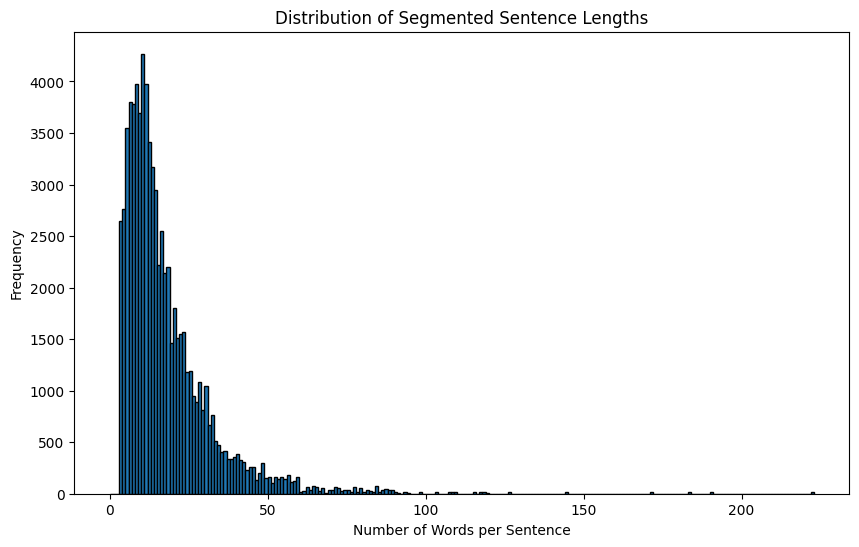

In [34]:
import matplotlib.pyplot as plt

# Plot histogram of segmented sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(segmented_sentence_lengths, bins=range(0, max(segmented_sentence_lengths) + 1, 1), edgecolor='black')
plt.title('Distribution of Segmented Sentence Lengths')
plt.xlabel('Number of Words per Sentence')
plt.ylabel('Frequency')
plt.show()


In [35]:
# Flatten the list of segmented sentences
segmented_sentences = all_segmented_sentences

# Count sentences starting with a conjunction
conjunction_starts = sum(1 for sentence in segmented_sentences if sentence.split()[0] in conjunctions)

# Count sentences ending with a boundary marker
boundary_marker_ends = sum(1 for sentence in segmented_sentences if sentence.split()[-1] in boundary_markers)

total_sentences = len(segmented_sentences)

print(f"Sentences starting with a conjunction: {conjunction_starts} ({(conjunction_starts/total_sentences)*100:.2f}%)")
print(f"Sentences ending with a boundary marker: {boundary_marker_ends} ({(boundary_marker_ends/total_sentences)*100:.2f}%)")

Sentences starting with a conjunction: 19174 (25.26%)
Sentences ending with a boundary marker: 56384 (74.28%)


- Interpretation: A high percentage of sentences starting with conjunctions might indicate over-segmentation.
- Considerations: In natural Urdu text, sentences typically do not start with conjunctions unless stylistically intended.